# 4 Processing responses

* 어바웃 파이썬 : 8월 - PsychoPy [1]
* 김무성

# Contents
* Are peripherals accurate enough? 
* Keyboard input
* If statements
* While loops
* Make some noise

#### 준비단계 
* ../ 폴더의 setup.ipynb 실행한 후

In [1]:
# 현재 디렉토리 확인 
%ls

04_Processing_responses.ipynb


In [2]:
# 실습 관련 책의 코드와 데이터
%ls ..

PEP_all-in-one/       ch03/                 setup.ipynb
README.md             ch04/
all-in-one.zip        hello_psychopy.ipynb


In [3]:
%ls ../PEP_all-in-one/Chapter_04/code/

01_Keyboard_input_PsychoPy.zip  02_While_Loops_PsychoPy.zip
01_Keyboard_input_PyGaze.zip    02_While_Loops_PyGaze.zip


In [4]:
# 실습 파일 가져오자
%cp -r ../PEP_all-in-one/Chapter_04 .

In [5]:
%ls

04_Processing_responses.ipynb  Chapter_04/


# Scripts

In [6]:
# 작업 디렉토리 이동 
%cd Chapter_04/code/

/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code


In [7]:
%ls

01_Keyboard_input_PsychoPy.zip  02_While_Loops_PsychoPy.zip
01_Keyboard_input_PyGaze.zip    02_While_Loops_PyGaze.zip


In [8]:
# 압축파일을 풀기위한 패키지
import zipfile

In [9]:
all_zip = zipfile.ZipFile('01_Keyboard_input_PsychoPy.zip')
all_zip.extractall('./')
all_zip.close()

In [10]:
%ls

01_Keyboard_input_PsychoPy/     02_While_Loops_PsychoPy.zip
01_Keyboard_input_PsychoPy.zip  02_While_Loops_PyGaze.zip
01_Keyboard_input_PyGaze.zip


In [11]:
# 작업 디렉토리 이동
%cd 01_Keyboard_input_PsychoPy/

/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code/01_Keyboard_input_PsychoPy


In [12]:
%ls

constants.py   experiment.py


### 실행 방법 1. 
콘솔창을 열어서 
python experiment.py  

### 실행 방법 2.

In [13]:
# 노트북에서 직접 실행
!python experiment.py

1.1985 	WARNING 	pyo audio lib was requested but not loaded: ImportError('No module named pyo',)
1.1999 	WARNING 	Monitor specification not found. Creating a temporary one...
1.2008 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


### 실행 방법 3.

In [14]:
import random
from constants import *
from psychopy.visual import Window, TextStim
from psychopy.event import waitKeys
from psychopy.sound import Sound

# create a new Display instance (to interact with the monitor)
disp = Window(size=DISPSIZE, units='pix', fullscr=True)

# create two Sounds: one for nice and one for stern feedback
high = Sound(value=4000, secs=0.5)
low = Sound(value=400, secs=0.5)

# a list of vowels
vowels = ['a', 'e', 'i', 'o', 'u', 'y']

# randomly choose one vowel
letter = random.choice(vowels)

# create a TextStim for the vowel
vowelstim = TextStim(disp, text=letter, height=128)

# draw the text stimulus
vowelstim.draw()
# update the monitor
disp.flip()

# wait for a response
resplist = waitKeys(maxWait=float('inf'), keyList=vowels, \
    timeStamped=True)
# select the first response from the list
key, presstime = resplist[0]

# check if the pressed key matches the displayed letter
if key == letter:
    correct = 1
else:
    correct = 0

# on a correct response...
if correct:
    # ...provide nice feedback
    feedback = 'Well done!'
    # (-1, 1, -1) is green
    fbcolour = (-1, 1, -1)
# on an incorrect response...
else:
    # ...provide nasty feedback
    feedback = 'You suck!'
    # (1, -1, -1) is red
    fbcolour = (1, -1, -1)

# construct an informative string by using variables
extrafb = 'The vowel was %s, and you typed %s.' \
    % (letter, key)

# create a stimulus for the feedback text
fbstim = TextStim(disp, text=feedback, color=fbcolour, \
    height=24)

# determine the position of the extra feedback
# (at half the screen width, and 60% of the screen height)
extrafbpos = (0, int(DISPSIZE[1]*-0.1))
# create a stimulus for the extra feedback
extrafbstim = TextStim(disp, text=extrafb, pos=extrafbpos, \
    height=24)

# show the feedback
fbstim.draw()
extrafbstim.draw()
disp.flip()

# on a correct response...
if correct:
    # ...play the high sine Sound
    high.play()
# on an incorrect response...
else:
    # ...play the low sine Sound
    low.play()

# wait for any keypress
waitKeys(maxWait=float('inf'), keyList=None)

# close the Display
disp.close()

1.1024 	WARNING 	pyo audio lib was requested but not loaded: ImportError('No module named pyo',)
1.1039 	WARNING 	Monitor specification not found. Creating a temporary one...
1.1047 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


# Are peripherals accurate enough?

There are researchers who argue that with timing imprecisions of several milliseconds, one cannot investigate mental processes that sometimes occur only during a few milliseconds. Therefore, they buy expensive devices (often connected in more intricate ways then USB) with extremely high polling rates to achieve ‘millisecond accuracy’.

So are they right? Yes, but only if the participants they were testing were free from timing imprecision. As all cognitive scientists know, people are not so consistent in their response times. In fact, people are so inconsistent that we need a lot of trials to accurately measure the distribution of their response times. This human timing inaccuracy is way higher than the timing inaccuracy of computer peripherals. <font color="red">The bottom line is that using keyboards is perfectly fine in most experimental designs</font>. For a more in-depth discussion, please read Damian (2010).


# Keyboard input

In [26]:
%pwd

u'/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code/01_Keyboard_input_PsychoPy'

In [27]:
%ls

constants.py   constants.pyc  experiment.py


In [28]:
!python experiment.py

1.1715 	WARNING 	pyo audio lib was requested but not loaded: ImportError('No module named pyo',)
1.1729 	WARNING 	Monitor specification not found. Creating a temporary one...
1.1738 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


### 코드를 스텝별로 살펴보자 

#### In constants.py, type the following:

<code>
PyGaze code
  \# display resolution (should match monitor settings!)
  DISPSIZE = (1920, 1080)
  \# display type (either 'pygame' or 'psychopy')
  DISPTYPE = 'psychopy'
  \# foreground and background
  FGC = (0, 0, 0)
  BGC = (128, 128, 128)

PsychoPy code
  \# display resolution (should match monitor settings!)
  DISPSIZE = (1920, 1080)
  \# foreground and background
  FGC = (-1, -1, -1)
  BGC = (0, 0, 0)
</code>    

#### Now, open experiment.py and type the following:

<code>
PyGaze code
  import random
  from pygaze.display import Display
  from pygaze.screen import Screen
  from pygaze.keyboard import Keyboard
  \# create a new Display instance (to interact with the
  \# monitor)
  disp = Display()
  \# create a new Screen (to use as a canvas to draw on)
  scr = Screen()

PsychoPy code
  import random
  from constants import *
  from psychopy.visual import Window, TextStim
  from psychopy.event import waitKeys
  \# create a new Display instance (to interact with the
  \# monitor)
  disp = Window(size=DISPSIZE, units='pix', fullscr=True)
</code>    

#### To do so, we need at least two things: a list of vowels, and a Keyboard instance (or PsychoPy’s waitKeys function).

<code>
PyGaze code
  \# a list of vowels
  vowels = ['a', 'e', 'i', 'o', 'u', 'y']
  \# create a new Keyboard instance, to monitor key presses
  kb = Keyboard(keylist=vowels, timeout=None)

PsychoPy code
  \# a list of vowels
  vowels = ['a', 'e', 'i', 'o', 'u', 'y']
</code>    

#### The next bit of the experiment script is to randomly select a vowel from the list, and present that on the monitor. Start with randomly choosing a vowel from the list:


<code>
PyGaze code
  \# randomly choose one vowel
  letter = random.choice(vowels)

PsychoPy code
  \# randomly choose one vowel
  letter = random.choice(vowels)
</code>    

#### To present this on the monitor, you must draw it on your Screen instance in PyGaze, or create a TextStim instance in PsychoPy.

<code>
PyGaze code
  \# draw the vowel on a Screen
  scr.draw_text(text=letter, fontsize=128)

PsychoPy code
  \# create a TextStim for the vowel
  vowelstim = TextStim(disp, text=letter, height=128)
</code>    

#### After drawing your text on a Screen, you need to pass that Screen to the Display. Then you need to update the monitor by showing the Display (PyGaze). If you’re using PsychoPy instead, you have to draw the TextStim, and then flip the Window.

<code>
PyGaze code
  \# fill the Display with a Screen and update the monitor
   disp.fill(scr)
   disp.show()

PsychoPy code
  \# draw the text stimulus
  vowelstim.draw()
  \# update the monitor
  disp.flip()
</code>    

#### To catch a key press, use the Keyboard’s get_key method (and close the Display with the familiar close method):

<code>
PyGaze code
  \# wait for a response
  key, presstime = kb.get_key()
  \# close the Display
  disp.close()

PsychoPy code
  \# wait for a response
  resplist = waitKeys(maxWait=float('inf'), keyList=vowels, timeStamped=True)
  \# select the first response from the list
  key, presstime = resplist[0]
  \# close the Display
  disp.close()
</code>    

# If statements

#### Same code for PyGaze and PsychoPy

<code>
\# check if the pressed key matches the displayed letter 
if key == letter:
    correct = 1
else:
    correct = 0
</code>    

#### Indentation

In [ ]:
a= 1
b= 2
c= 3
if a == 1:
    if b == 2:
        if c == 3:
            print('strawberry')
        else:
            print('raspberry')
    else:
        print('blueberry') 
else:
    print('banana')

#### Providing feedback

<code>
PyGaze code
  \# on a correct response...
  if correct:
    \#...provide nice feedback ???? 
    feedback = "Well done!"
    
    \# (0,255,0) is green ???? 
    fbcolour = (0, 255, 0)
  \# on an incorrect response...
  else:
    \#...provide nasty feedback ???? 
    feedback = "You're wrong!"
    \# check if the pressed key matches the displayed letter 
    \# (255,0, 0) is red ???? 
    fbcolour = (255, 0, 0)
    
PsychoPy code:
  \# on a correct response...
  if correct:
    \#...provide nice feedback ???? 
    feedback = "Well done!" 
    \# (-1, 1, -1) is green ???? 
    fbcolour = (-1, 1, -1)
  \# on an incorrect response...
  else:
    \#...provide nasty feedback ???? feedback = "You're wrong!" ???? # (1, -1, -1) is red
    fbcolour = (1, -1, -1)

</code>    

#### This defines the feedback string and the feedback’s colour, but does not show the participant anything yet. For that, you need to update the Screen and Display in PyGaze, or the Window in PsychoP

<code>
PyGaze code
  \# first clear the Screen of its current content
  scr.clear()
  \# then draw the feedback text
  scr.draw_text(text=feedback, colour=fbcolour, fontsize=24)
  \# show the Screen with feedback
  disp.fill(scr)
  disp.show()
    
PsychoPy code
  \# create a stimulus for the feedback text
  fbstim = TextStim(disp, text=feedback, color=fbcolour, height=24)
  \# show the feedback
  fbstim.draw()
  disp.flip()
</code>    

### It would be nice to have a self-paced ending, where the participant can end the experiment by pressing any key. For this end, use the get_key method or the waitKeys function without any restrictions on the allowed keys or the timeout. Add the following code directly after the disp.show() or disp.flip() line:

<code>
PyGaze code
  \# wait for any keypress
  kb.get_key(keylist=None, timeout=None)

PsychoPy code
  \# wait for any keypress
  waitKeys(maxWait=float('inf'), keylist=None)
</code>

#### Using wildcards in feedback

<code>
Same code for PyGaze and PsychoPy¶
   \# construct an informative string by using variables 
   extrafb = 'The vowel was %s, and you typed %s.' % (letter, key)
</code>

#### After scr.draw_text(text=feedback, colour=fbcolour, fontsize=24) or after fbstim = TextStim(disp, text=feedback, color=fbcolour, height=24), add extra lines to draw the extra feedback:

<code>
PyGaze code
  \# determine the position of the extra feedback
  \# (at half the screen width, and 60% of the screen height)
  extrafbpos = (int(DISPSIZE[0]*0.5), int(DISPSIZE[1]*0.6))
  \# draw the extra feedback
  scr.draw_text(text=extrafb, pos=extrafbpos, fontsize=24)

PsychoPy code
  \# determine the position of the extra feedback
  \# (at half the screen width, and 60% of the screen height)
  extrafbpos = (0, int(DISPSIZE[1]*-0.1))
  \# create a stimulus for the extra feedback
  extrafbstim = TextStim(disp, text=extrafb, pos=extrafbpos, height=24)
  \# draw the extra feedback
  extrafbstim.draw()
</code>

#### Using sound for feedback

##### 만약 ka-ching.wav란 파일이 있으면

<code>
PyGaze code
  from pygaze.sound import Sound
  kaching = Sound(soundfile='ka-ching.wav')

PsychoPy code
  from psychopy.sound import Sound
  kaching = Sound(value='ka-ching.wav')
</code>

##### 아니면 합성을 해서

In [20]:
from pygaze.sound import Sound
sine = Sound(osc='sine')
saw = Sound(osc='saw')
square = Sound(osc='square')
noise = Sound(osc='whitenoise')

In [21]:
sine.play()

In [22]:
saw.play()

In [23]:
square.play()

In [24]:
noise.play()

#### You can specify the duration of sounds in milliseconds by using the length keyword in PyGaze, or the secs keyword in PsychoPy:

<code>
PyGaze example
  sine = Sound(osc='sine', length=500)
    
PsychoPy example
  sine = Sound(secs=0.5)
</code>

#### In PyGaze, you can specify the frequency by using the freq keyword and a value in Hertz. In PsychoPy, you can use the value keyword to achieve the same thing.

<code>
PyGaze example
  sine = Sound(osc='sine', freq=4000, length=500)

PsychoPy example
  sine = Sound(value=4000, secs=0.5)
</code>    

#### Open (a copy of) the script you created in the previous section, and import the Sound class at the top of experiment.py:

<code>
PyGaze code
  from pygaze.sound import Sound
    
PsychoPy code
  from psychopy.sound import Sound
</code>    

#### To create two Sound instances, add the following lines after the scr = Screen() line in the PyGaze code, or after the line where you define disp in the PsychoPy code:


<code>
PyGaze code
  \# Create two Sounds, one for nice and one for stern
  \# feedback
  sine = Sound(osc='sine', freq=4000, length=500)
  noise = Sound(osc='whitenoise', length=500)

PsychoPy code
  \# create two Sounds: one for nice and one for stern
  \# feedback
  high = Sound(value=4000, secs=0.5)
  low = Sound(value=400, secs=0.5)
</code>

#### The final step is to include an if statement between the disp.show() or disp.flip() line for the feedback, and the kb.get_key(keylist=None, timeout=None) or waitKeys(maxWait=inf, keylist=None) line to wait for a final keypress:

<code>
PyGaze code
  \# on a correct response...
  if correct:
      \#...play the sine Sound
      sine.play()
  \# on an incorrect response...
  else:
      \#...play the harsh Sound 
      noise.play()

PsychoPy code
  \# on a correct response...
  if correct:
      \#...play the high sine Sound
      high.play()
  \# on an incorrect response...
  else:
      \#...play the low sine Sound
      low.play()
</code>

# While loops

In [35]:
%pwd

u'/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code/01_Keyboard_input_PsychoPy'

In [36]:
%ls ../

01_Keyboard_input_PsychoPy/     02_While_Loops_PsychoPy.zip
01_Keyboard_input_PsychoPy.zip  02_While_Loops_PyGaze.zip
01_Keyboard_input_PyGaze.zip


In [37]:
%cd ../

/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code


In [38]:
%ls

01_Keyboard_input_PsychoPy/     02_While_Loops_PsychoPy.zip
01_Keyboard_input_PsychoPy.zip  02_While_Loops_PyGaze.zip
01_Keyboard_input_PyGaze.zip


In [39]:
all_zip = zipfile.ZipFile('02_While_Loops_PsychoPy.zip')
all_zip.extractall('./')
all_zip.close()

In [40]:
%ls

01_Keyboard_input_PsychoPy/     02_While_Loops_PsychoPy/
01_Keyboard_input_PsychoPy.zip  02_While_Loops_PsychoPy.zip
01_Keyboard_input_PyGaze.zip    02_While_Loops_PyGaze.zip


In [41]:
%cd 02_While_Loops_PsychoPy

/Users/moodern/work/00_aboutpython_psychopy/ch04/Chapter_04/code/02_While_Loops_PsychoPy


In [42]:
%ls

constants.py   experiment.py


In [43]:
!python experiment.py

1.1837 	WARNING 	Monitor specification not found. Creating a temporary one...
1.1845 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


#### if - elif 형태로 멀티옵션 제시하기

<code>
key, presstime = kb.get_key(keylist=None, timeout=None)
if key == 'c':
    print('chicken') 
elif key == 'p':
    print('parsnip') 
elif key == 't':
    print('tomato') 
else:
    print('No soup for you!')
</code>

#### One solution to continuous keyboard monitoring and display updating could be to copy and paste the code to collect, draw, and present a single keypress value:

<code>
\# first keypress
key, presstime = kb.get_key(keylist=None, timeout=None)
scr.daw_text(text=key)
disp.fill(scr)
disp.show()
  
\# second keypress
key, presstime = kb.get_key(keylist=None, timeout=None)
scr.daw_text(text=key)
disp.fill(scr)
disp.show()

\# etc...
  
\# N-th keypress
key, presstime = kb.get_key(keylist=None, timeout=None)
scr.daw_text(text=key)
disp.fill(scr)
disp.show()
</code>

#### A better solution is provided by the while loop 

Let’s look at a famous scene from Lord of the Rings, where Gandalf (our guard) decides that his friends can run across a bridge, but that a big flaming enemy SHALL NOT PASS! You could view this scene as a number of iterations (loops) through Gandalf’s decision process. In this process, Gandalf first checks who passes by. Then he decides whether this passer-by is an enemy or a friend. If the passer-by is a friend, Gandalf does nothing, because he’s cool with bridge-crossing friends. However, if the passer-by turns out to be an enemy, Gandalf decides to stop letting people through. After he decides to stop letting people through, he will destroy the bridge.

Gandalf’s bridge-habits can be described by the following code snippet:

<code>
\# pre-define the 'guard' value
gandalf_is_cool = True
    
\# only continue if gandalf_is_cool is still True
while gandalf_is_cool:
    \# check who crosses with this function
    passerby = check_who_goes_there()
    \#if an enemy crosses, Gandalf loses his cool!  
    if passerby == 'enemy':
        gandalf_is_cool = False

\# destroy the bridge after the while loop
destroy_bridge()    
</code>

### While loop for responses

#### In constants.py, define the constants that you always define:

<code>
PyGaze code
  \# the display size should match the monitor's resolution
  DISPSIZE = (1920, 1080)
  \# the display type can be 'pygame' or 'psychopy'
  DISPTYPE = 'pygame'
  \# the foreground and background colour are (red, green,
  \# blue) the values are 0 (no colour) to 255 (full colour)
  FGC = (255, 255, 255)
  BGC = (0, 0, 0)

PsychoPy code
  \# the display size should match the monitor's resolution
  DISPSIZE = (1920, 1080)
  \# the foreground and background colour are (red, green, blue)
  \# the values are -1 (no colour) to 1 (full colour)
  FGC = (1, 1, 1)
  BGC = (-1, -1, -1)
</code>

#### In experiment.py, import the classes and constants that you need in the script:

<code>
PyGaze code
  from constants import DISPSIZE
  from pygaze.display import Display
  from pygaze.screen import Screen
  from pygaze.keyboard import Keyboard

PsychoPy code
  from constants import DISPSIZE
  from psychopy.visual import Window, TextStim 
  from psychopy.event import waitKeys
</code>    

#### And create the instances of these classes that you will use later on:

<code>
PyGaze code
  \# create a Display to show things on the monitor
  disp = Display()
  \# create a Screen for drawing operations
  scr = Screen()
  \# create a Keyboard to collect keypresses
  kb = Keyboard(keylist=None, timeout=None)

PsychoPy code
  \# create a Window to show things on the monitor
  disp = Window(size=DISPSIZE, units='pix', fullscr=True)
</code>

#### Same code for PyGaze and PsychoPy

<code>
\# define a super-important question
question = 'What do you think of this question?'
</code>

#### After defining the question string, you could draw it on a Screen and present that Screen via the Display (PyGaze), or create and draw a text stimulus (PsychoPy). Of course, you should also think of a nice place on the Screen. How about horizontally centred, and placed at 20 per cent of the screen height? Make sure to turn the values for the position into integers, because pixels are indivisible!

<code>
PyGaze code
  \# define the question's position
  qpos = (int(DISPSIZE[0]*0.5), int(DISPSIZE[1]*0.2))
  \# draw it on the Screen
  scr.draw_text(text=question, pos=qpos, fontsize=24)
  \# fill the Display with the Screen
  disp.fill(scr)
  \# present the current Display
  disp.show()

PsychoPy code
  \# define the question's position
  qpos = (0, int(DISPSIZE[1]*0.2))
  \# create a new text stimulus
  qstim = TextStim(disp, text=question, pos=qpos, height=24)
  \# draw the question
  qstim.draw()
  \# create an additional text stimulus for the response
  \# (this will be updated later)
  respstim = TextStim(disp, text='', height=24)
</code>

#### a while loop that runs until the Enter key is pressed, and collects and presents keypresses while it is running.

Let’s think about this for a second (always think before you start coding!). To be able to update a participant’s response with each keypress, you need a variable that contains the response. This should start out as an empty string, and should be adjusted on each keypress.

#### Same code for PyGaze and PsychoPy

<code>
\# start with an empty response string
response = ''
  
\# start undone
done = False

\# loop until done == False 
while not done:
    \# do stuff
</code>    

#### Note how # do stuff is undefined. Let’s replace this by functioning lines, starting with the code to check for keypresses (add it to experiment.py):

<code>
PyGaze code
    \# check for keypresses
    key, presstime = kb.get_key()

PsychoPy code
    \# check for keypresses
    resplist = waitKeys(maxWait=float('inf'), keyList=None, timeStamped=True)
    \# use only the first in the returned list of 
    \# keypresses
    key, presstime = resplist[0]
</code>

#### Now add the code that evaluates the value of key. If the name of the pressed key is Space, add a space. An example (don’t copy it into experiment.py just yet):

<code>
if key == 'space': 
    response += ' '
    
if len(key) == 1: 
    response += key
    
if key == 'backspace' and len(response) > 0: 
    response = response[0:-1]
    
if key == 'return': 
    done = True
</code>    

#### Same code for PyGaze and PsychoPy

<code>
    # check if the length of the key's name equals 1 
    if len(key) == 1:
        # add the key to the response 
        response += key
    # check if the key is the Space bar 
    elif key == 'space':
        # add a space to the response 
        response += ' '
    # check if the key's name was 'backspace' and 
    # check if the response has at least 1 character 
    elif key == 'backspace' and len(response) > 0:
        # remove the last character of the response 
        response = response[0:-1]
    
    # if the key was none of the above, check if it 
    # was the Enter key
    if key == 'return':
        # set done to True 
        done = True
</code>

#### The final thing you should add to the while loop, is actually presenting the updated response.

<code>
PyGaze code
    \# draw the current response on a Screen 
    scr.draw_text(text=response, fontsize=24)
    \# fill the Display with the response Screen 
    disp.fill(scr)
    \# show the Display on the monitor 
    disp.show()

PsychoPy code
    \# update the response stimulus 
    respstim.setText(response)
    \# draw the response stimulus 
    respstim.draw()
    \# update the monitor 
    disp.flip()
</code>

#### As usual, end the experiment by closing the Display:

<code>
Same code for PyGaze and PsychoPy
    \# close the Display 
    disp.close()
</code>

#### ReDraw

In PyGaze, you have to reset the Screen before you draw an updated response on it. The Screen’s clear method should come in handy here: it clears the Screen of whatever is on it. Unfortunately, it will also clear the question that you drew on the top of the Screen. This means that you will have to redraw that with every response update too.

With PsychoPy, there is a different issue: the question disappears after pressing the first key! This is because the flip method clears the entire monitor, and stimuli have to be actively re-drawn.
If you use PyGaze, replace the scr.draw_text(text=response, fontsize=24) line with the lines below. For PsychoPy, add the lines below after the respstim.setText(response) line.

<code>
PyGaze code
    \# clear the current content of scr
    scr.clear()
    \# redraw the question
    scr.draw_text(text=question, pos=qpos, fontsize=24)
    \# draw the current response on a Screen
    scr.draw_text(text=response, fontsize=24)

PsychoPy code
    \# re-draw the question stimulus
    qstim.draw()
</code>

### 전체 코드 

#### PyGaze code

In [45]:
from constants import DISPSIZE
from pygaze.display import Display
from pygaze.screen import Screen
from pygaze.keyboard import Keyboard

disp = Display()
scr = Screen()
kb = Keyboard(keylist=None, timeout=None)

question = 'What do you think of this question?'
qpos = (int(DISPSIZE[0]*0.5), int(DISPSIZE[1]*0.2))
scr.draw_text(text=question, pos=qpos, fontsize=24)

disp.fill(scr)
disp.show()

response = ''
done = False

while not done:
    key, presstime = kb.get_key()
    if len(key) == 1:
        response += key
    elif key == 'space':
        response += ' '
    elif key == 'backspace' and len(response) > 0:
        response = response[0:-1]
    
    if key == 'return':
        done = True
    
    scr.clear()
    scr.draw_text(text=question, pos=qpos, fontsize=24)
    scr.draw_text(text=response, fontsize=24)
    disp.fill(scr)
    disp.show()
    
disp.close()

23334.6077 	WARNING 	Monitor specification not found. Creating a temporary one...
23334.6615 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size
23335.5925 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23340.9407 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23340.9413 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23346.1796 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23346.1802 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23347.2675 	WARNING 	Desired color [-0.00392157 -0.00392157

23356.8475 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23356.8481 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23357.4311 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23357.4317 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23358.8787 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23358.8792 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor gamut. Drawing blue instead
23359.0711 	WARNING 	Desired color [-0.00392157 -0.00392157 -0.00392157] (in RGB 0->1 units) falls outside the monitor

#### PsychoPy code

In [47]:
from constants import DISPSIZE
from psychopy.visual import Window, TextStim
from psychopy.event import waitKeys

disp = Window(size=DISPSIZE, units='pix', fullscr=True)

question = 'What do you think of this question?'
qpos = (0, int(DISPSIZE[1]*0.2))
qstim = TextStim(disp, text=question, pos=qpos, height=24)
qstim.draw()

respstim = TextStim(disp, text='', height=24)

response = ''
done = False

while not done:
    resplist = waitKeys(maxWait=float('inf'), keyList=None, timeStamped=True)
    key, presstime = resplist[0]
    if len(key) == 1:
        response += key
    elif key == 'space':
        response += ' '
    elif key == 'backspace' and len(response) > 0: 
        response = response[0:-1]
    
    if key == 'return': 
        done = True

    respstim.setText(response)
    qstim.draw()
    respstim.draw()
    disp.flip()

disp.close()

23589.2192 	WARNING 	Monitor specification not found. Creating a temporary one...
23589.2200 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


#### display 관련

<code>
PyGaze code
  from pygaze.display import Display
    
PsychoPy code
  from psychopy.visual import Window
</code>    

<code>
PyGaze code
  disp = Display()

PsychoPy code
  disp = Window(units='pix', fullscr=True)
</code>    

<code>
PyGaze code
  disp.close()

PsychoPy code
  disp.close()
</code>    

In [50]:
from psychopy.visual import Window

# Initialise a new Window instance.
disp = Window(size=DISPSIZE, units='pix', fullscr=True)

# Close the Display again.
disp.close()

668.8704 	WARNING 	Monitor specification not found. Creating a temporary one...
668.8710 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1280, 800]. Using actual size


# MAKE SOME NOISE

#### Sinusoid and noise


In [49]:
%matplotlib inline

In [50]:
import numpy

# create a range of numbers between 0 and 2pi
x = numpy.arange(0, 2*numpy.pi, 0.01)

# create a sine wave
sine = numpy.sin(x)

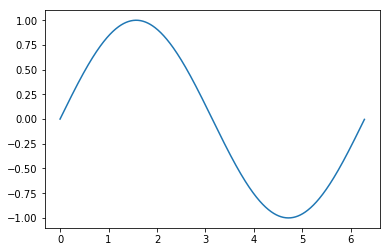

In [51]:
from matplotlib import pyplot

# plot the sine wave
pyplot.plot(x, sine)
pyplot.show()

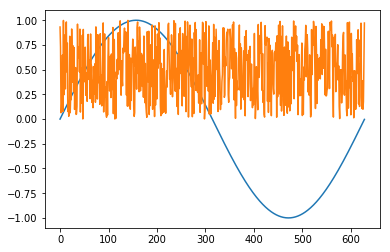

In [52]:
# create a bunch of random numbers
# (with the same length as the sine wave)
noise = numpy.random.rand(len(sine))

# compare the sinusoid and the noise
pyplot.plot(sine)
pyplot.plot(noise)
pyplot.show()

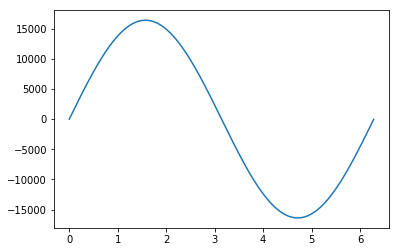

In [53]:
sine = sine * 16383
pyplot.plot(x, sine)
pyplot.show()

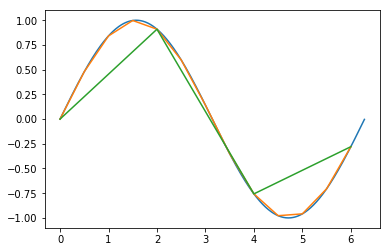

In [54]:
high = numpy.arange(0, 2*numpy.pi, 0.01)
mid = numpy.arange(0, 2*numpy.pi, 0.5)
low = numpy.arange(0, 2*numpy.pi, 2)

pyplot.plot(high, numpy.sin(high))
pyplot.plot(mid, numpy.sin(mid))
pyplot.plot(low, numpy.sin(low))
pyplot.show()

# 참고자료
* [1] Python for Experimental Psychologists - https://www.amazon.com/Python-Experimental-Psychologists-Edwin-Dalmaijer/dp/1138671576
* [2] 책 정보 & 코드 - http://www.pygaze.org/pep/
* [3] 코드 한번에 받기 - http://www.pygaze.org/resources/downloads/PEP/all-in-one.zip
    